### Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

### Objective

* Which variables are significant in predicting the price of a house, and

* How well those variables describe the price of a house.

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [177]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings;
warnings.filterwarnings('ignore');

In [178]:
#read data from CSV file
hdf=pd.read_csv('train.csv')

#### Analyzing the Data

In [179]:
hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [180]:
hdf.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [181]:
numeric_features=hdf.select_dtypes(include=[np.number])
categorical_features=hdf.select_dtypes(include=[np.object])

In [182]:
numeric_features.columns
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

### Helper Functions

In [183]:
#check for missing values
def calculate_missing_values(type, df):
    print("Total Number of  {} in the dataset : {} ".format(type, len(df.select_dtypes(include=[np.number]).columns)))
    print("Feature : Percentage and Total Missing Values")
    print("______________________________________")
    for col in df.columns:
        if hdf[col].isnull().sum() > 0:
            print("{} : {}% : {} : {} ".format(col, round((hdf[col].isnull().sum()/len(hdf))*100,2), hdf[col].isnull().sum(), hdf[col].dtype))

In [184]:
#Calculate Outliers
outliers_percentage={}
def calculate_outliers_percentage(df):
    global outliers_percentage
    for feature in df.columns:
        IQR=df[feature].quantile(.75)-df[feature].quantile(.25)
        outliers_count=df[(df[feature]>(df[feature].quantile(.75)+1.5*IQR)) | (df[feature]<(df[feature].quantile(.25)-1.5*IQR))].shape[0]
        outliers_percentage[feature]=round(outliers_count/df.shape[0]*100,2)
        
    outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
    print(outlier_df.sort_values(by="Percentage", ascending=False))
  

### Analyzing Numerical Columns

In [185]:
calculate_missing_values("Numerical Features ",numeric_features)

Total Number of  Numerical Features  in the dataset : 38 
Feature : Percentage and Total Missing Values
______________________________________
LotFrontage : 17.74% : 259 : float64 
MasVnrArea : 0.55% : 8 : float64 
GarageYrBlt : 5.55% : 81 : float64 


#### Outlier Detection

- Let's see the outliers present in the Numerical Features of the Dataset

In [186]:
outliers_percentage={}
for feature in numeric_features.columns:
    IQR=numeric_features[feature].quantile(.75)-numeric_features[feature].quantile(.25)
    outliers_count=numeric_features[(numeric_features[feature]>(numeric_features[feature].quantile(.75)+1.5*IQR)) | (numeric_features[feature]<(numeric_features[feature].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[feature]=round(outliers_count/numeric_features.shape[0]*100,2)
        
outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

,Features,Percentage
30,EnclosedPorch,14.25
10,BsmtFinSF2,11.44
5,OverallCond,8.56
32,ScreenPorch,7.95
1,MSSubClass,7.05
8,MasVnrArea,6.58
2,LotFrontage,6.03
18,BsmtHalfBath,5.62
29,OpenPorchSF,5.27
3,LotArea,4.73


Observation:
- As can be seen from above Outliers Dataframe, majority of Numerical Columns have Outliers
- More than 75% of the total Numerical Columns have Outliers, hence dropping the tuples with Outliers will cause loss of information. 
- The ideal thing to do in the case where the Outliers weigh out would be to assign the maximum and minimum values to those rows where feature value is outside the range of  (Q1 - 1.5* IQR, Q3 + 1.5 * IQR), where Q1 is 25th Percentile and Q3 is 75th Percentile
- Since SalePrice is the target column and modifying the Target column values will turn things upside down

In [187]:
target_column="SalePrice"
for feature, percentage in outliers_percentage.items():
    if feature!= target_column:
        IQR = numeric_features[feature].quantile(.75) - numeric_features[feature].quantile(.25)
        Q1=numeric_features[feature].quantile(.25)
        Q3=numeric_features[feature].quantile(.75)
        min_ = Q1 - 1.5 * IQR
        max_ = Q3 + 1.5 * IQR
        hdf[feature][hdf[feature] < min_] = min_
        hdf[feature][hdf[feature] > max_] = max_


In [188]:
calculate_outliers_percentage(numeric_features)

         Features  Percentage
5     OverallCond        8.56
3         LotArea        4.73
37      SalePrice        4.18
21   BedroomAbvGr        2.40
16      GrLivArea        2.12
11      BsmtUnfSF        1.99
27     GarageArea        1.44
13       1stFlrSF        1.37
9      BsmtFinSF1        0.48
24     Fireplaces        0.34
26     GarageCars        0.34
17   BsmtFullBath        0.07
35         MoSold        0.00
36         YrSold        0.00
25    GarageYrBlt        0.00
34        MiscVal        0.00
28     WoodDeckSF        0.00
33       PoolArea        0.00
30  EnclosedPorch        0.00
23   TotRmsAbvGrd        0.00
31      3SsnPorch        0.00
32    ScreenPorch        0.00
29    OpenPorchSF        0.00
0              Id        0.00
22   KitchenAbvGr        0.00
20       HalfBath        0.00
1      MSSubClass        0.00
18   BsmtHalfBath        0.00
15   LowQualFinSF        0.00
14       2ndFlrSF        0.00
12    TotalBsmtSF        0.00
10     BsmtFinSF2        0.00
8      Mas

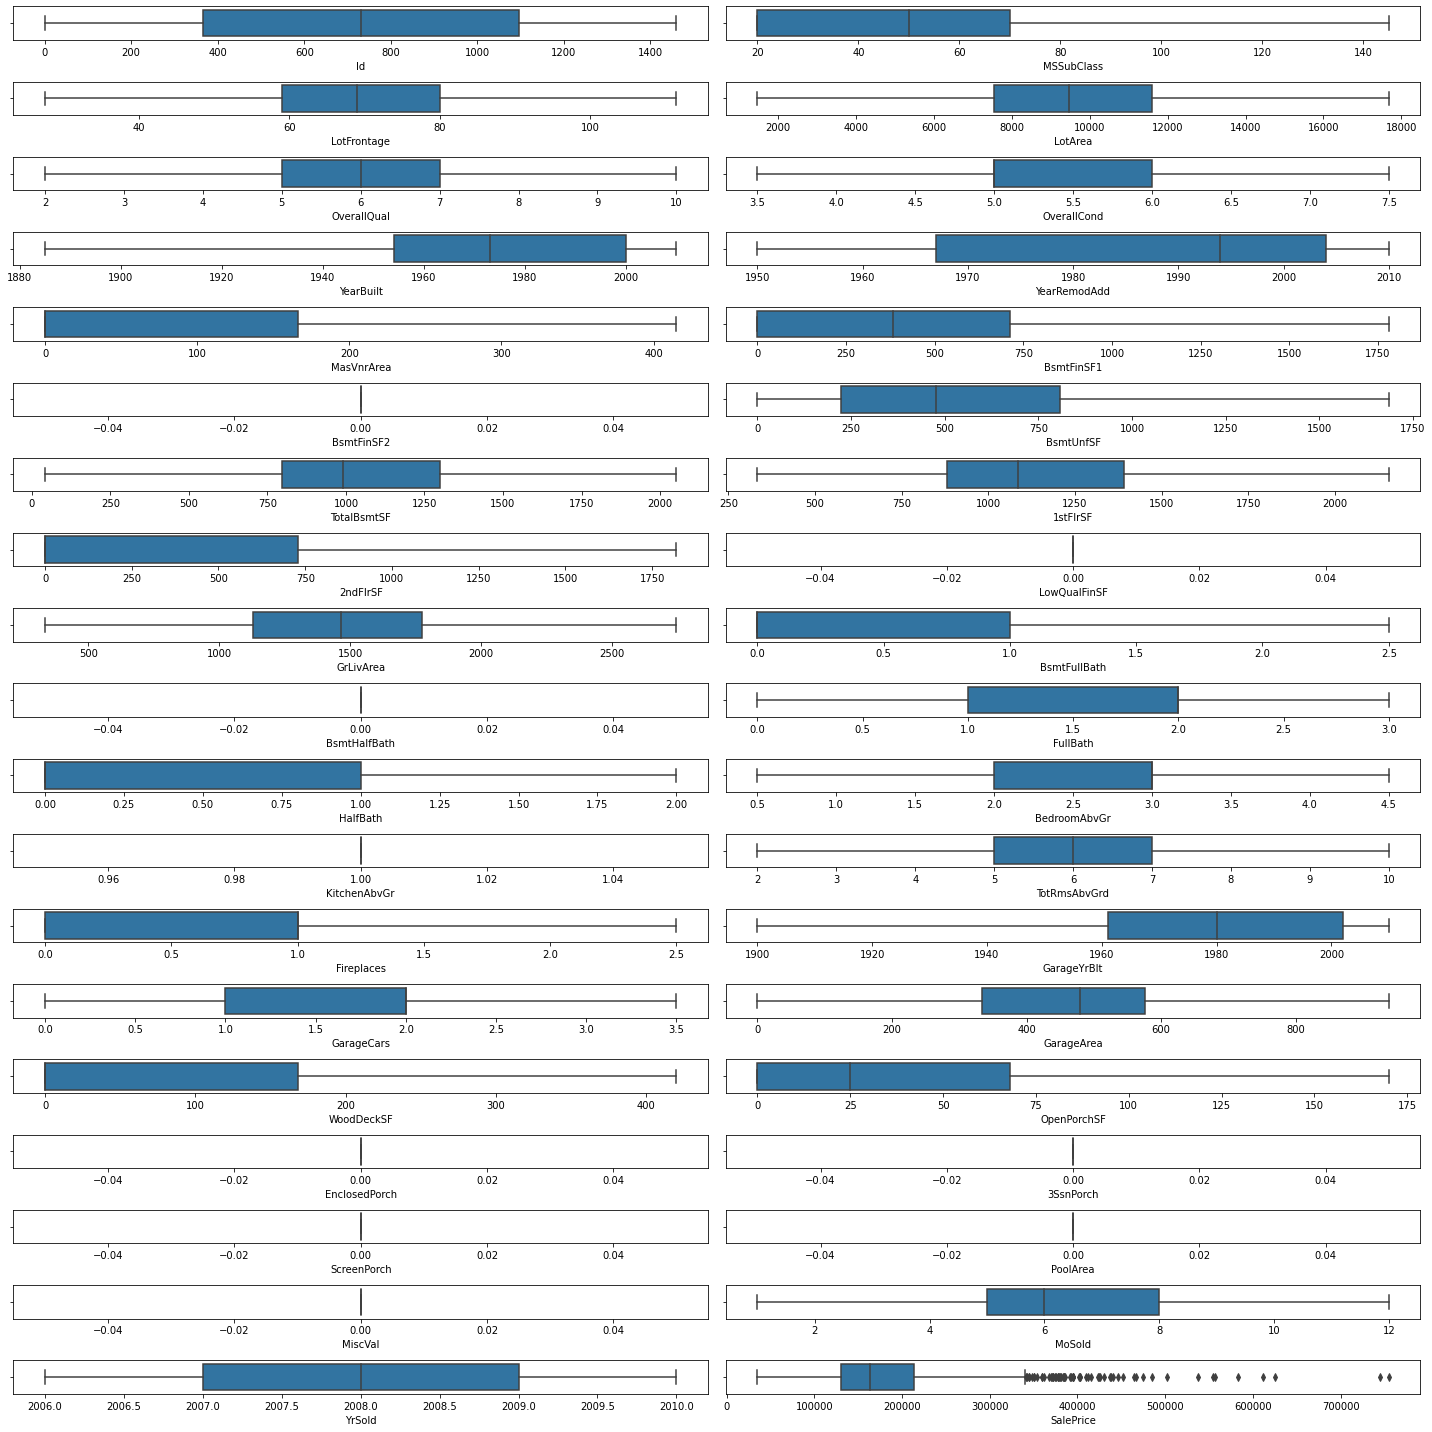

In [189]:
fig=plt.subplots(figsize=(20,20))
for index, feature in enumerate(numeric_features.columns):
    plt.subplot(19,2,index+1)
    sns.boxplot(hdf[feature])
    plt.tight_layout()

In [190]:
numeric_features.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0,1460.000000,1460.000000,1460.000000
mean,730.500000,55.085616,69.134888,10516.828082,6.100685,5.575342,1971.299315,1984.865753,90.192149,443.639726,...,91.806849,42.603425,0.0,0.0,0.0,0.0,0.0,6.321918,2007.815753,180921.195890
std,421.610009,37.508183,19.662022,9981.264932,1.378430,1.112799,30.108397,20.645407,134.925253,456.098091,...,116.658120,52.501584,0.0,0.0,0.0,0.0,0.0,2.703626,1.328095,79442.502883
min,1.000000,20.000000,27.500000,1300.000000,2.000000,1.000000,1885.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,214000.000000
max,1460.000000,145.000000,111.500000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,415.000000,5644.000000,...,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,755000.000000


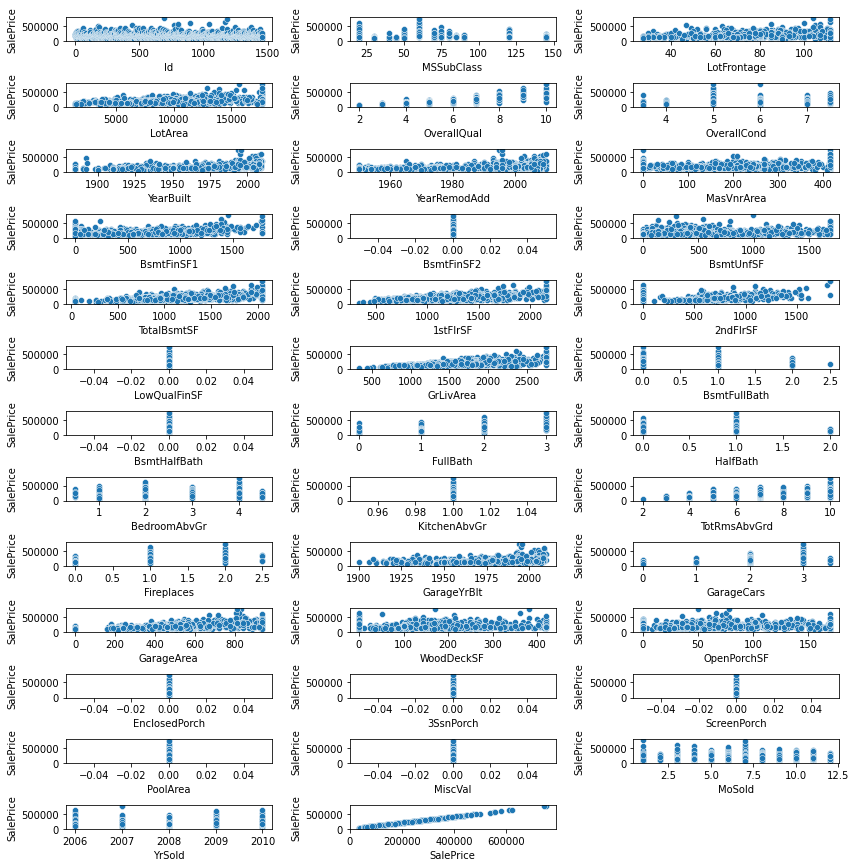

In [191]:
fig=plt.subplots(figsize=(12,12))

for index, feature in enumerate(numeric_features.columns):
    plt.subplot(13,3,index+1)
    sns.scatterplot(hdf[feature], hdf[target_column])
    plt.tight_layout()

Observation:
- Features LotFrontage, LotArea,  YearBuilt, YearRemodAdd, MasVarArea, BsmtFinSF1, TotalBsmtSF, 1stFlrSF, 2ndFlrSf, GrLivArea, GarageYrBlt, GarageArea, WoodDeckSF show a linear relation with Sales Prices which is our target variable
- OpenPorchSF, BsmtUnfSF show non linear Relationship and probably need some form of Transformation
- 'BsmtFinSF2','LowQualFinSF', 'BsmtHalfBath','KitchenAbvGr', 'EnclosedPorch','3SsnPorch' ,'ScreenPorch' , 'PoolArea', 'MiscVal' are having single values and do not add any value to the model, so can be discarded.
- ID feature is unique for every tuple and can be discarded since it doesnt add much value to the model

In [192]:
numeric_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [193]:
hdf.drop(['Id', 'BsmtFinSF2','LowQualFinSF', 'BsmtHalfBath','KitchenAbvGr', 'EnclosedPorch','3SsnPorch' ,'ScreenPorch' , 'PoolArea', 'MiscVal'], axis=1, inplace=True)

In [194]:
numeric_features.drop(['Id', 'BsmtFinSF2','LowQualFinSF', 'BsmtHalfBath','KitchenAbvGr', 'EnclosedPorch','3SsnPorch' ,'ScreenPorch' , 'PoolArea', 'MiscVal'], axis=1, inplace=True)

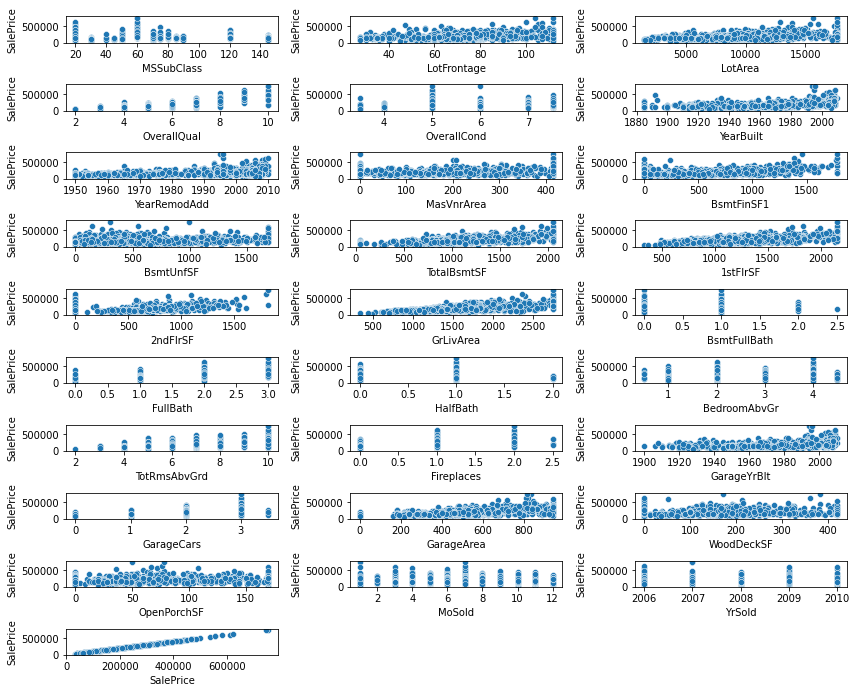

In [195]:
fig=plt.subplots(figsize=(12,12))

for index, feature in enumerate(numeric_features.columns):
    plt.subplot(13,3,index+1)
    sns.scatterplot(hdf[feature], hdf[target_column])
    plt.tight_layout()

#### Analyzing Discrete Features
Discrete Features: 'MSSubClass' , 'OverAllQual', 'OverAllCond' , 'BsmtFullBath' , 'FullBath', 'HalfBath', 'BedroomAbvGr' , 'TotRmsAbvGrd' , 'Fireplaces'. 'GarageCars', 'MoSold' , 'YrSold'

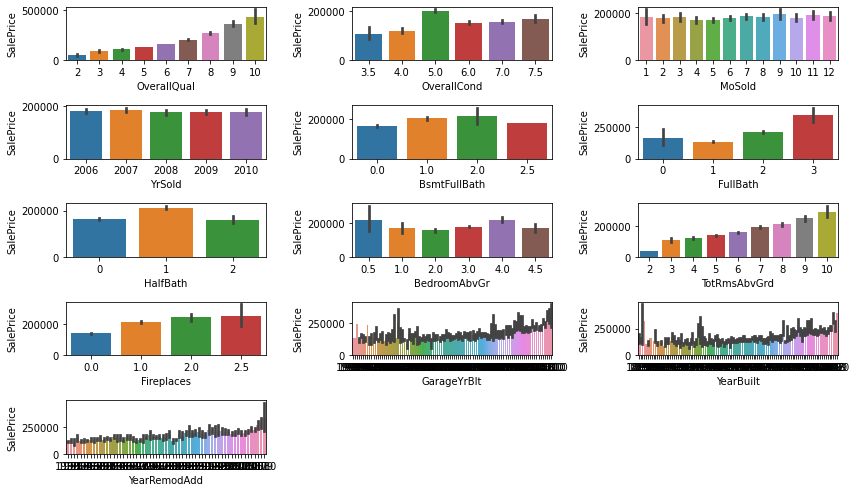

In [196]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.barplot(hdf[feature], hdf['SalePrice'])
    plt.tight_layout()

Observations:
1. SalePrice increases based on OverAllQual features
2. SalePrice is highest for OverAllCond rating 5
3. SalePrice is highest for Basement with 2 Full Bathrooms
4. More the number of total number of rooms above grade more the sale price
5. Year Based Column/Features can be used to extract useful information


#### Handling Date Columns

In [197]:
year_features=['YearBuilt','YearRemodAdd','GarageYrBlt', 'YrSold']
hdf[year_features].describe()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
count,1460.000000,1460.000000,1379.000000,1460.000000
mean,1971.299315,1984.865753,1978.506164,2007.815753
std,30.108397,20.645407,24.689725,1.328095
min,1885.000000,1950.000000,1900.000000,2006.000000
25%,1954.000000,1967.000000,1961.000000,2007.000000
50%,1973.000000,1994.000000,1980.000000,2008.000000
75%,2000.000000,2004.000000,2002.000000,2009.000000
max,2010.000000,2010.000000,2010.000000,2010.000000


In [198]:
for feature in year_features:
    hdf[feature]=2022- hdf[feature]
    numeric_features[feature]=2022- numeric_features[feature]

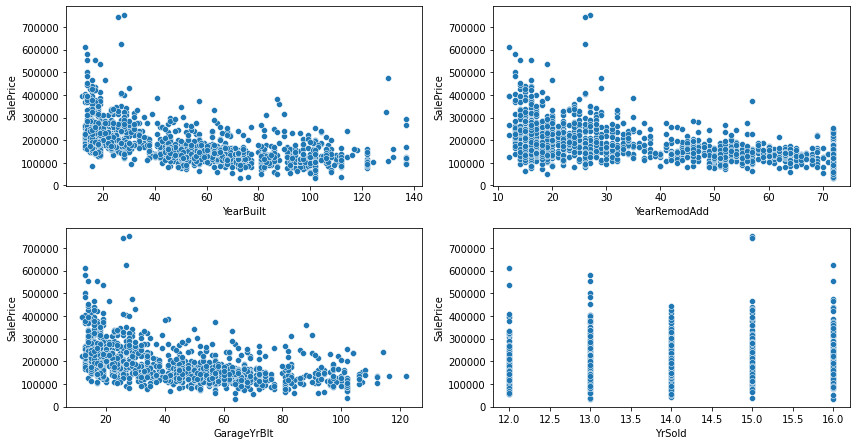

In [199]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(year_features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(hdf[feature], hdf['SalePrice'])
    plt.tight_layout()

Observations:
- Most garages were built in past 20 years and the Sale Price is also higher for houses during this period of time
- Cannot come to a conclusion based on year Sold Vs Sales price trend Chart
- Most houses were build in past 20 years, also the price for the houses which were built in last 20 years is too high
- Recently remodelled houses have been sold for Higher Price

Distribution of Numerical features

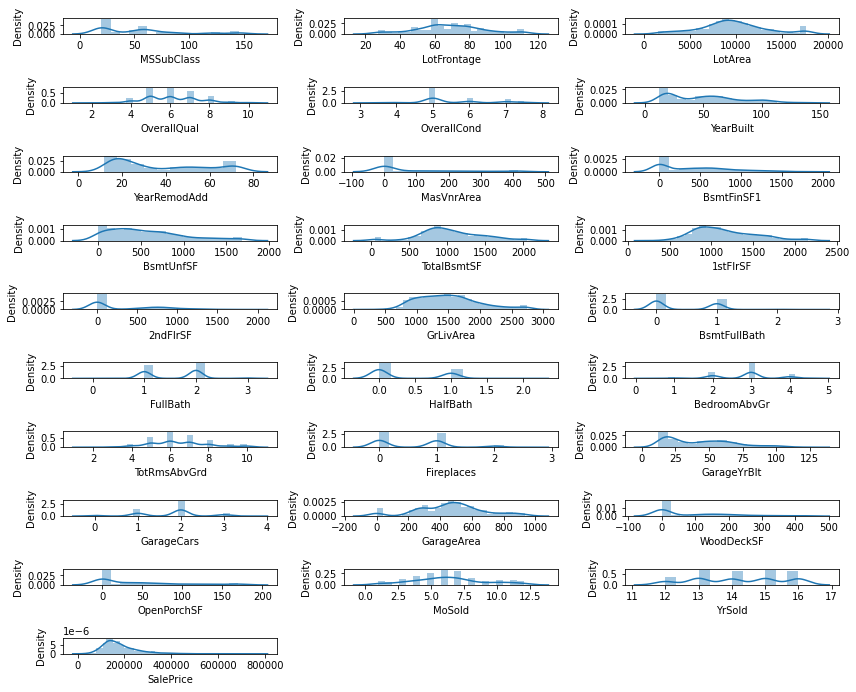

In [200]:
fig=plt.subplots(figsize=(12,12))
for index, feature in enumerate(numeric_features.columns):
    plt.subplot(13,3,index+1)
    sns.distplot(hdf[feature])
    plt.tight_layout()

#### Coorelation Plot of Numerical Features

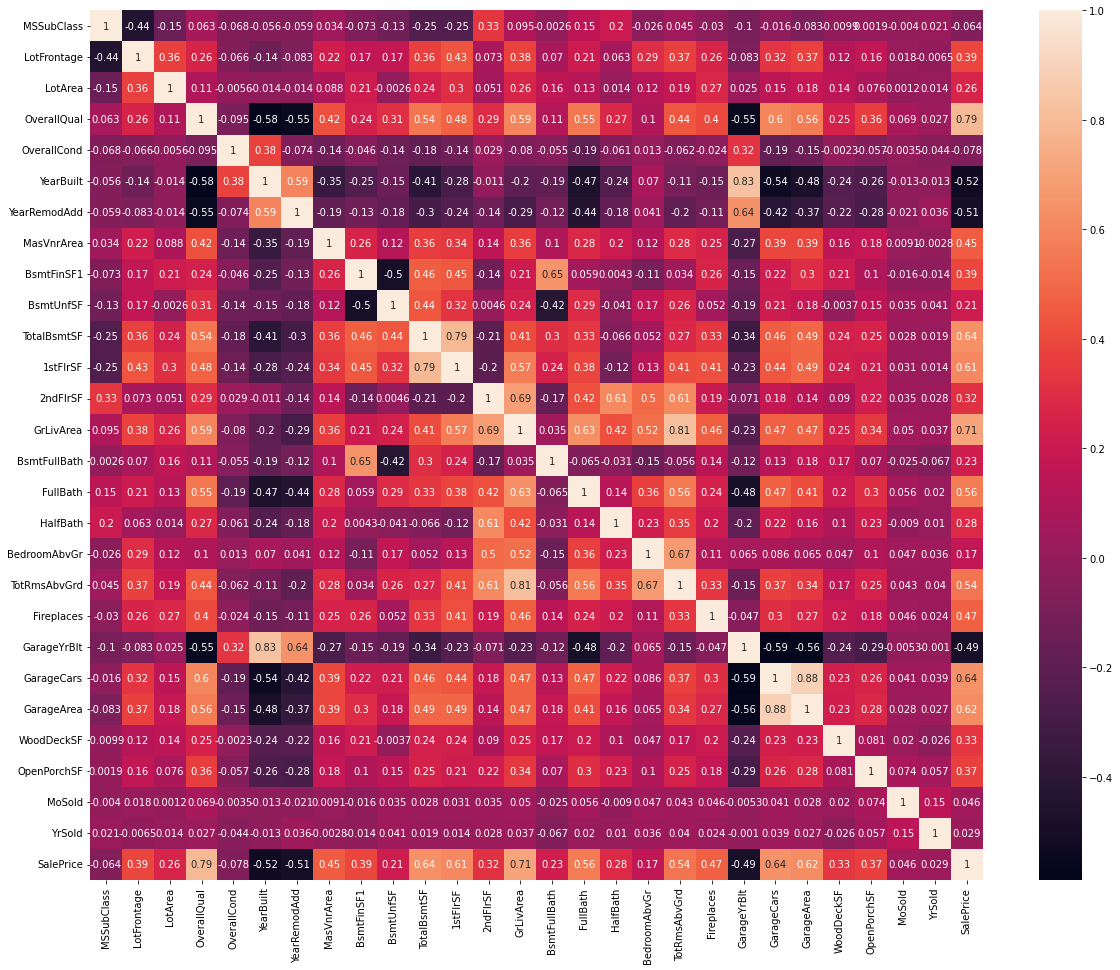

In [201]:
plt.figure(figsize=(20,16))
sns.heatmap(numeric_features.corr(),annot=True)
plt.show()

Observations
- GarageYrBlt is highly correlated with YearBuilt with a score of 0.83
- GarageCars is highly correlated with GarageArea with a score of 0.88
- GrLiveArea is highly correlated with TotalRmsAbvGrd with a score of 0.81
- OverAllQual is highly correlated with the Target Variable SalesPrice with a score of 0.79
- TotalBsmtSF and 1stflrSF are highly correalted with each other with a score of  0.79

#### Dealing with Null Values of Numeric Features

In [202]:
print(calculate_missing_values("Numerical Features ", numeric_features))

Total Number of  Numerical Features  in the dataset : 28 
Feature : Percentage and Total Missing Values
______________________________________
LotFrontage : 17.74% : 259 : float64 
MasVnrArea : 0.55% : 8 : float64 
GarageYrBlt : 5.55% : 81 : float64 
None


In [203]:
# We can drop GarageYrBlt column since it is highly correlated with SalePrice
numeric_features.drop(['GarageYrBlt'], axis=1, inplace=True)
hdf.drop(['GarageYrBlt'], axis=1, inplace=True)

In [204]:
# there are just 8 missing values in the MasVnrArea Feature so dropping the missing tuples wont affect the model performance
hdf= hdf[~hdf['MasVnrArea'].isnull()]
numeric_features= numeric_features[~numeric_features['MasVnrArea'].isnull()]

In [205]:
hdf['LotFrontage'] = hdf['LotFrontage'].fillna(hdf['LotFrontage'].mean())
numeric_features['LotFrontage'] = numeric_features['LotFrontage'].fillna(hdf['LotFrontage'].mean())


In [206]:
calculate_missing_values("Numerical Features ", numeric_features)

Total Number of  Numerical Features  in the dataset : 27 
Feature : Percentage and Total Missing Values
______________________________________


In [207]:
### Analyzing Categorical Features
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [208]:
calculate_missing_values("Categorical Features ",categorical_features)

Total Number of  Categorical Features  in the dataset : 0 
Feature : Percentage and Total Missing Values
______________________________________
Alley : 93.8% : 1362 : object 
BsmtQual : 2.55% : 37 : object 
BsmtCond : 2.55% : 37 : object 
BsmtExposure : 2.62% : 38 : object 
BsmtFinType1 : 2.55% : 37 : object 
BsmtFinType2 : 2.62% : 38 : object 
Electrical : 0.07% : 1 : object 
FireplaceQu : 47.25% : 686 : object 
GarageType : 5.58% : 81 : object 
GarageFinish : 5.58% : 81 : object 
GarageQual : 5.58% : 81 : object 
GarageCond : 5.58% : 81 : object 
PoolQC : 99.52% : 1445 : object 
Fence : 80.65% : 1171 : object 
MiscFeature : 96.28% : 1398 : object 


Observation:
- PoolQC has the highest number of Nulls 
- For 'Alley', Nan means 'No access to Alley'
- For 'BsmtQual' , 'BsmtCond', 'BsmtExposure', 'BsmtFinType1' , 'BsmtFinType2' Nan means 'No Basement'/
- For GarageType, GarageFinish, GarageQual, GarageCond Nan means 'No Garage'
- For 'FireplaceQu'  and 'Fence' Nan means 'No Fire place' and 'No Fence' respectively
- MiscFeature - Nan means no additional features mentioned

In [209]:
categorical_columns= ['Alley', 'BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',  'Fence', 'MiscFeature']

In [210]:
#imputing missing values with "Not Applicable for above Categorical features 
def populating_categorical(columns, hdf):
    for column in columns:
        if column == 'Alley':
            hdf[column]=hdf[column].fillna('No Access to Alley')
        elif column == 'BsmtQual' or column == 'BsmtCond' or column == 'BsmtExposure' or column == 'BsmtFinType1' or column == 'BsmtFinType2':
            hdf[column]=hdf[column].fillna('No Basement')
        elif column == 'FireplaceQu':
            hdf[column]=hdf[column].fillna('No Fireplace')
        elif column == 'GarageType' or column == 'GarageFinish' or column == 'GarageQual' or column == 'GarageCond':
            hdf[column]=hdf[column].fillna('No Garage')
        elif column == 'Fence':
            hdf[column]=hdf[column].fillna('No Fence')
        elif column == 'MiscFeature':
            hdf[column]=hdf[column].fillna('No additional Features')


In [211]:
populating_categorical(categorical_columns, hdf)
populating_categorical(categorical_columns, categorical_features)

In [212]:
calculate_missing_values("Categorical Features ",hdf)


Total Number of  Categorical Features  in the dataset : 27 
Feature : Percentage and Total Missing Values
______________________________________
Electrical : 0.07% : 1 : object 
PoolQC : 99.52% : 1445 : object 


Feature Electrical has one missing Null value imputing with mode would do no harm 

In [213]:
hdf['Electrical'] = hdf['Electrical'].fillna(hdf['Electrical'].mode()[0])
categorical_features['Electrical'] = categorical_features['Electrical'].fillna(categorical_features['Electrical'].mode()[0])

Let's drop PoolQc since it has more than 99% of null values

In [214]:
hdf.drop(['PoolQC'], axis=1, inplace=True)
categorical_features.drop(['PoolQC'], axis=1, inplace=True)

In [215]:
len(hdf.columns)

69

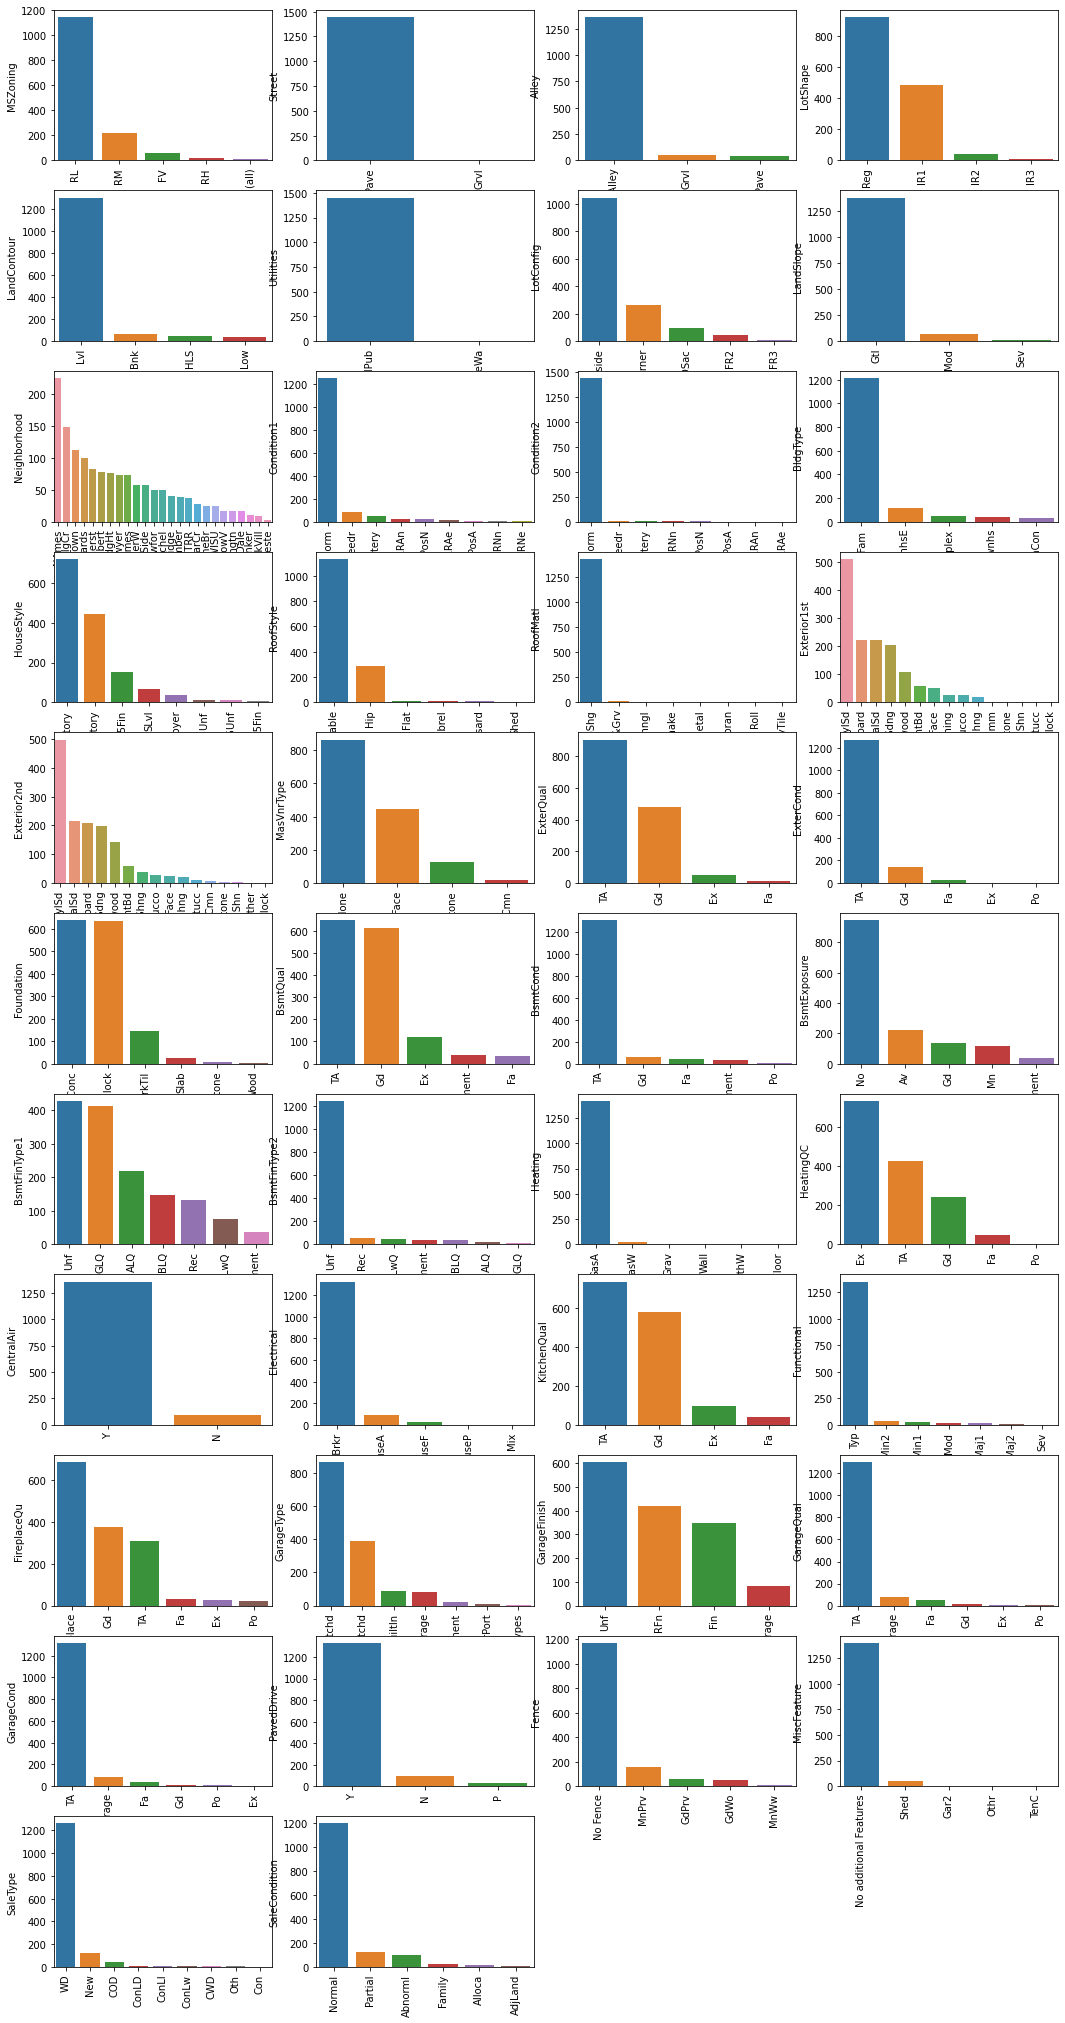

In [216]:
plt.figure(figsize=(18,36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
for col in categorical_features.columns:
  y = hdf[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

In [217]:
hdf.columns.shape

(69,)

### Encoding Categorical Nominal Features



In [218]:

hdf['LotShape'] = hdf['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
hdf['Utilities'] = hdf['Utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
hdf['LandSlope'] = hdf['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
hdf['HouseStyle'] = hdf['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
hdf['ExterQual'] = hdf['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
hdf['ExterCond'] = hdf['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
hdf['BsmtQual'] = hdf['BsmtQual'].map({'No Basement':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
hdf['BsmtCond'] = hdf['BsmtCond'].map({'No Basement':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
hdf['BsmtExposure'] = hdf['BsmtExposure'].map({'No Basement':0,'No':1,'Mn':2,'Av':3,'Gd':4})
hdf['BsmtFinType1'] = hdf['BsmtFinType1'].map({'No Basement':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
hdf['BsmtFinType2'] = hdf['BsmtFinType2'].map({'No Basement':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
hdf['HeatingQC'] = hdf['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
hdf['CentralAir'] = hdf['CentralAir'].map({'N':0,'Y':1})
hdf['KitchenQual'] = hdf['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
hdf['GarageFinish'] = hdf['GarageFinish'].map({'No Garage':0,'Unf':1,'RFn':2,'Fin':3})
hdf['GarageQual'] = hdf['GarageQual'].map({'No Garage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
hdf['GarageCond'] = hdf['GarageCond'].map({'No Garage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
hdf['Functional'] = hdf['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
hdf['FireplaceQu'] = hdf['FireplaceQu'].map({'No Fireplace':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [219]:
#imputing missing values with "Not Applicable for above Categorical features 
def populating_categorical(columns, hdf):
    for column in columns:
        if column == 'Alley':
            hdf[column]=hdf[column].fillna('No Access to Alley')
        elif column == 'BsmtQual' or column == 'BsmtCond' or column == 'BsmtExposure' or column == 'BsmtFinType1' or column == 'BsmtFinType2':
            hdf[column]=hdf[column].fillna('No Basement')
        elif column == 'FireplaceQu':
            hdf[column]=hdf[column].fillna('No Fireplace')
        elif column == 'GarageType' or column == 'GarageFinish' or column == 'GarageQual' or column == 'GarageCond':
            hdf[column]=hdf[column].fillna('No Garage')
        elif column == 'Fence':
            hdf[column]=hdf[column].fillna('No Fence')
        elif column == 'MiscFeature':
            hdf[column]=hdf[column].fillna('No additional Features')


In [220]:
encoded_columns=['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageFinish', 'GarageQual', 'GarageCond', 'Functional', 'FireplaceQu' ]
hdf[encoded_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotShape      1452 non-null   int64
 1   Utilities     1452 non-null   int64
 2   LandSlope     1452 non-null   int64
 3   HouseStyle    1452 non-null   int64
 4   ExterQual     1452 non-null   int64
 5   ExterCond     1452 non-null   int64
 6   BsmtQual      1452 non-null   int64
 7   BsmtCond      1452 non-null   int64
 8   BsmtExposure  1452 non-null   int64
 9   BsmtFinType1  1452 non-null   int64
 10  BsmtFinType2  1452 non-null   int64
 11  HeatingQC     1452 non-null   int64
 12  KitchenQual   1452 non-null   int64
 13  GarageFinish  1452 non-null   int64
 14  GarageQual    1452 non-null   int64
 15  GarageCond    1452 non-null   int64
 16  Functional    1452 non-null   int64
 17  FireplaceQu   1452 non-null   int64
dtypes: int64(18)
memory usage: 215.5 KB


<AxesSubplot:title={'center':'No. of Unique values of Each Categorical Feature'}>

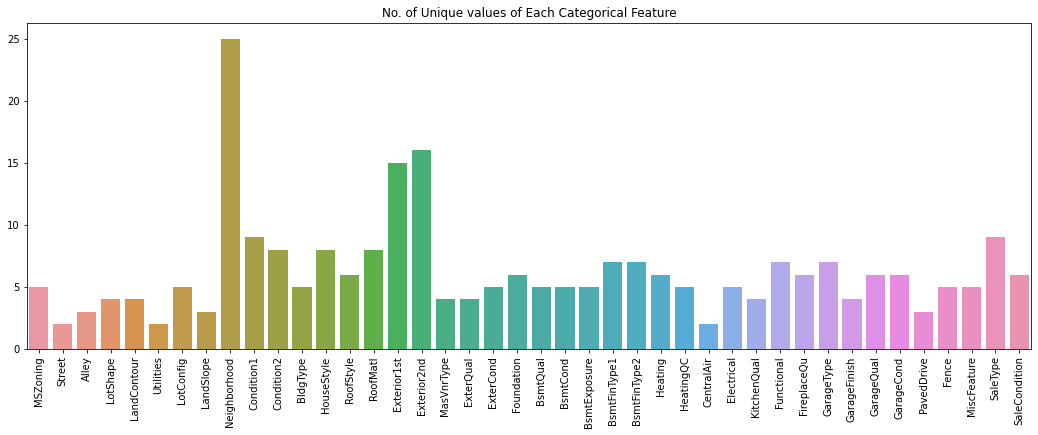

In [221]:
unique_values = []
for col in categorical_features.columns:
  unique_values.append(hdf[col].unique().size)
plt.figure(figsize=(18,6))
plt.title('No. of Unique values of Each Categorical Feature')
plt.xticks(rotation=90)
sns.barplot(x=categorical_features.columns,y=unique_values)

In [222]:
unordered_cats= [ i for i in categorical_features.columns.tolist() if i not in encoded_columns]

In [223]:
len(unordered_cats)

24

In [224]:
cat_vars={}
new_columns=0
def calculate_uniques(columns, df):
    print("Total Unorderd Categorical Variables: ",len(unordered_cats))
    global new_columns
    for column in columns:
        if(len(df[column].unique()) >=5):
            cat_vars[column] = len(df[column].unique())
            new_columns=new_columns+len(df[column].unique()) - 1
    cat_vars_df=pd.DataFrame({'variable':list(cat_vars.keys()),'categories':list(cat_vars.values())})
            
    print(cat_vars_df, '\n')
    print("Total number of new columns: ")
    print("____________________________________________________")
    print(new_columns)

In [225]:
calculate_uniques(unordered_cats, hdf)

Total Unorderd Categorical Variables:  24
         variable  categories
0        MSZoning           5
1       LotConfig           5
2    Neighborhood          25
3      Condition1           9
4      Condition2           8
5        BldgType           5
6       RoofStyle           6
7        RoofMatl           8
8     Exterior1st          15
9     Exterior2nd          16
10     Foundation           6
11        Heating           6
12     Electrical           5
13     GarageType           7
14          Fence           5
15    MiscFeature           5
16       SaleType           9
17  SaleCondition           6 

Total number of new columns: 
____________________________________________________
133


Observation:
- From the above analysis adding 144 new coloumns would make the model too complex

In [226]:
dummy_df = pd.get_dummies(hdf[unordered_cats], drop_first=True)

In [227]:
dummy_df.shape

(1452, 145)

In [228]:
hdf=pd.concat([hdf,dummy_df],axis=1)

In [229]:
hdf.drop(unordered_cats,axis=1,inplace=True)

In [230]:
hdf.shape

(1452, 189)

Let's Evaluate the Target Variable Sales Price

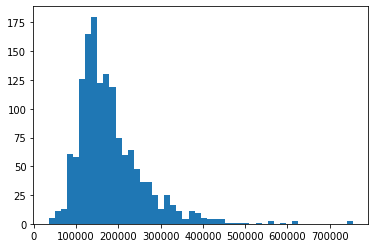

In [231]:
hdf['SalePrice'].describe()
plt.hist(hdf['SalePrice'],bins=50)
plt.show()

Observation:
- The Distribution plot seems to be right skewed
- We will perform the transformation once we have train and test split

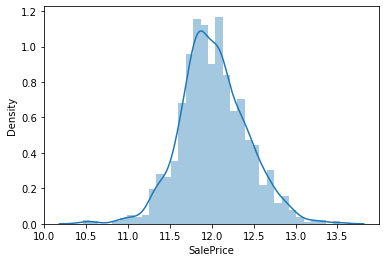

In [232]:
sns.distplot(np.log(hdf['SalePrice']))
plt.show()

In [233]:
Y= np.log(hdf['SalePrice'])

## Model Building

### 1. Splitting into Train and Test Data

In [234]:
X_train, X_test, Y_train, Y_test= train_test_split(hdf.drop('SalePrice',axis=1),Y,test_size=0.3,random_state=101)

In [235]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1016, 188)
(436, 188)
(1016,)
(436,)


### 2. Feature Scaling

In [236]:
numerical_vars= X_train.select_dtypes(include=['int64','float64']).columns
stdScaler= StandardScaler()


In [237]:
X_train[numerical_vars]= stdScaler.fit_transform(X_train[numerical_vars])
X_test[numerical_vars]= stdScaler.transform(X_test[numerical_vars])

### 3. Model Building

In [238]:
lr=LinearRegression()
lr.fit(X_train,Y_train)


LinearRegression()

In [239]:
def build_model(columns):
    X_train_sm=sm.add_constant(X_train[columns])
    lr=sm.OLS(Y_train,X_train_sm).fit()
    print(lr.summary())
    return lr

In [240]:
def calculate_vif(columns):
    vif=pd.DataFrame()
    df=X_train[columns]
    vif["features"]=df.columns
    vif["VIF"]= [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif["VIF"]=round(vif["VIF"],2)
    vif=vif.sort_values(by="VIF",ascending=False)
    print(vif)

In [241]:

def printR2Score(y, y_pred):
    print("R2 Score: ", r2_score(y, y_pred))

In [242]:
build_model(X_train.columns)
calculate_vif(X_train.columns)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     75.45
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:37:28   Log-Likelihood:                 969.42
No. Observations:                1016   AIC:                            -1569.
Df Residuals:                     831   BIC:                            -658.0
Df Model:                         184                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

`Observations:`
1. The Adjusted R2Score is 93% and R2 Score is 94%

### 4. Model Evaluation

(1016, 188)
(1016, 189)


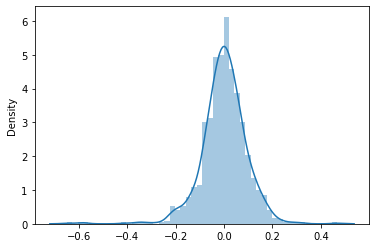

In [243]:
X_train_sm= sm.add_constant(X_train)
lr=sm.OLS(Y_train,X_train_sm).fit()
Y_Train_pred= lr.predict(X_train_sm)
res=Y_train- Y_Train_pred
sns.distplot(res)
print(X_train.shape)
print(X_train_sm.shape)

In [244]:
printR2Score(Y_train, Y_Train_pred)

R2 Score:  0.943525043855262


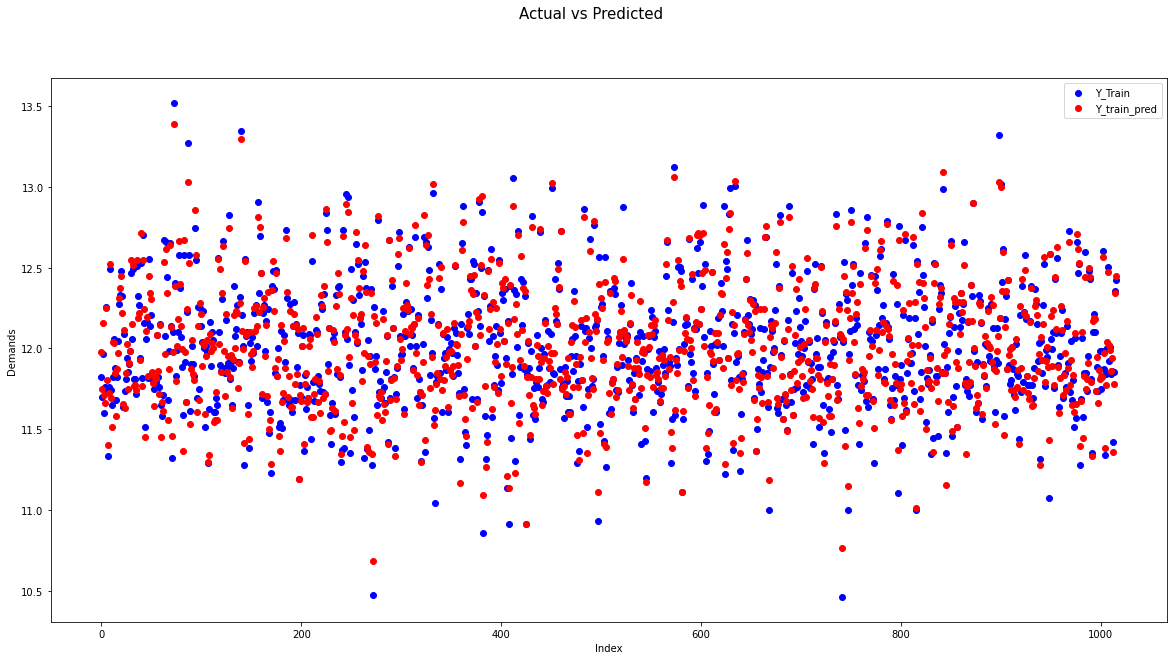

In [245]:
plt.figure(figsize=(20,10))
xtrain = [i for i in range(0,len(X_train_sm),1)]

plt.scatter(xtrain,Y_train, color="blue", label="Y_Train")
plt.scatter(xtrain,Y_Train_pred, color="red", label="Y_train_pred")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.legend()
plt.show()

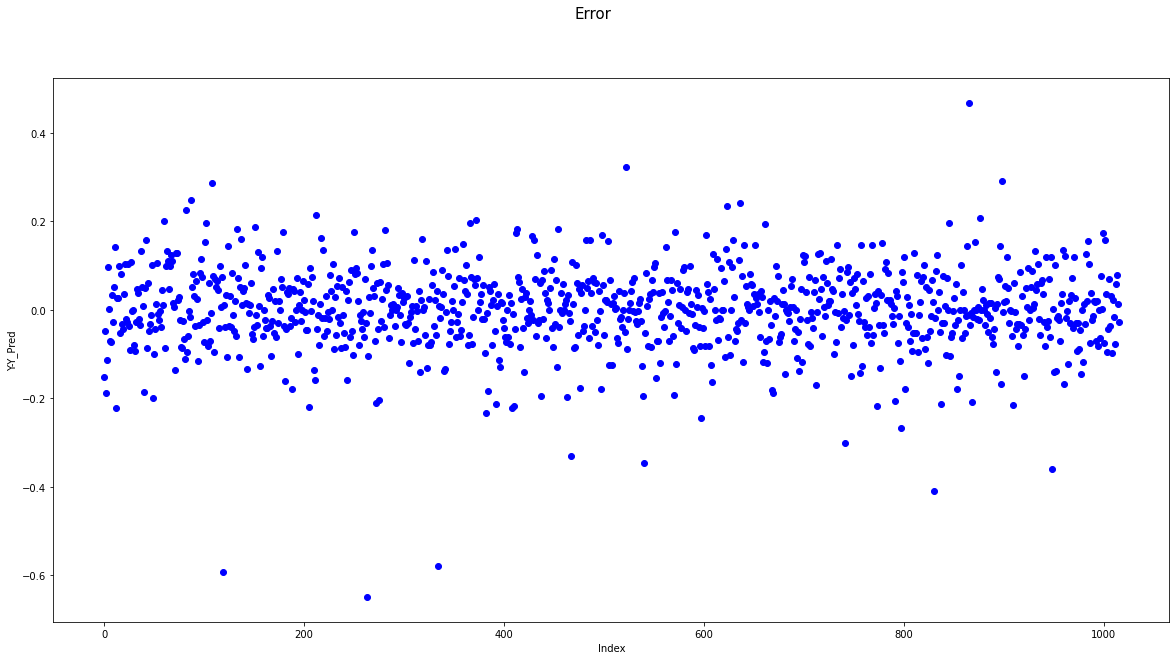

In [246]:
plt.figure(figsize=(20,10))
xerror=[ i for i in range(0, len(X_train_sm),1)]
plt.plot(xerror,res, color="blue", marker="o", linewidth=0)
plt.suptitle('Error', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Y-Y_Pred')
plt.show()

In [247]:
X_test_sm= sm.add_constant(X_test, has_constant='add')

<AxesSubplot:ylabel='Density'>

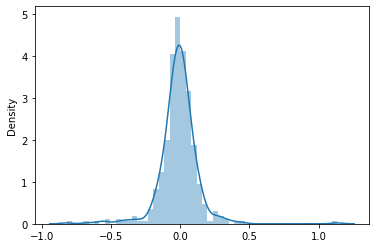

In [248]:
Y_Test_pred=lr.predict(X_test_sm)
test_res= Y_test- Y_Test_pred
sns.distplot(test_res)

In [249]:
printR2Score(Y_test, Y_Test_pred)

R2 Score:  0.8863723780153416


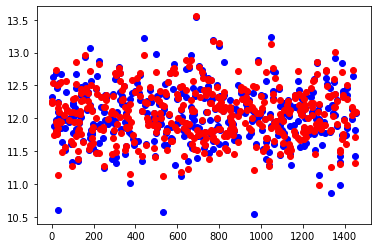

In [250]:
plt.scatter(y=Y_test, x=Y_test.index, color="blue", label="Y_Test")
plt.scatter(y=Y_Test_pred, x=Y_test.index, color="red", label="Y_Test_pred")
#plt.plot(Y_test.index, [Y_test.mean() ]*Y_test.shape[0], color="red", label="Y_Test")
#plt.plot(Y_test.index, Y_Test_pred, color="green", label="Y_Test")

`Observations:`
1. The Assumption of MLR are being satisfied here
1. The error state is normally distributed
2. The error state is independent of the independent variables
3. The error state is not correlated with the independent variables/ Error should be independent
4. Homoscedasticity is satisfied
5. No Multicollinearity
6. Linearity is there among Target Variable and Independent Variables

In [251]:


def build_model(X_train, y_train, X_test, params, model='ridge'):
  if model == 'ridge':
    estimator_model = Ridge()
  else:
    estimator_model = Lasso()
  model_cv = GridSearchCV(estimator = estimator_model, 
                          param_grid = params, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
  model_cv.fit(X_train, y_train)
  alpha = model_cv.best_params_["alpha"]
  final_model = model_cv.best_estimator_
  ####Plot 
 ## for i in X_train.columns:
   # plt.figure(figsize=(20,10))
    #plt.scatter(X_train[i], y_train, color="blue", label="y_train", linewidth=3)




  final_model.fit(X_train, y_train)
  y_train_pred = final_model.predict(X_train)
  y_test_pred = final_model.predict(X_test)
 
  # Model Evaluation
  print(model," Regression with ",alpha)
  print("===================================")
  print('R2 score (train) : ',r2_score(y_train,y_train_pred))
  print('R2 score (test) : ',r2_score(Y_test,y_test_pred))
  print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
  print('RMSE (test) : ', np.sqrt(mean_squared_error(Y_test, y_test_pred)))

  return final_model, y_test_pred

In [252]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_final_model, y_test_predicted = build_model(X_train, Y_train, X_test, params, model='ridge')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
ridge  Regression with  20
R2 score (train) :  0.9168422632686922
R2 score (test) :  0.91946576098174
RMSE (train) :  0.1130842067614676
RMSE (test) :  0.11751139371231017


In [253]:
params = {'alpha': [ 0.002]}

lasso_final_model, y_test_predicted = build_model(X_train, Y_train, X_test, params, model='lasso')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
lasso  Regression with  0.002
R2 score (train) :  0.9017129593475985
R2 score (test) :  0.9148188329245375
RMSE (train) :  0.12294157005218179
RMSE (test) :  0.12085412838296877


In [254]:
model_coefficients = pd.DataFrame(index=X_test.columns)
model_coefficients.rows = X_test.columns

model_coefficients['Ridge (alpha=20.0)'] = ridge_final_model.coef_
model_coefficients['Lasso (alpha=0.001)'] = lasso_final_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

,Ridge (alpha=20.0),Lasso (alpha=0.001)
MSSubClass,-0.014620,-0.006518
LotFrontage,0.007732,0.005345
LotArea,0.023215,0.024849
LotShape,-0.000348,-0.002371
Utilities,0.005117,0.002066
LandSlope,0.015392,0.013890
HouseStyle,0.013065,0.000724
OverallQual,0.068301,0.081421
OverallCond,0.052198,0.053663
YearBuilt,-0.051120,-0.066589


`Observation:`
- Ridge Regression Results:
    - Optimum alpha for ridge is 20.000000
    - R2 score (train) :  0.9168422632686922
    - R2 score (test) :  0.91946576098174
    - RMSE (train) :  0.1130842067614676
    - RMSE (test) :  0.11751139371231017

- Lasso Regression Results:
    - lasso  Regression with  0.001
    - R2 score (train) :  0.9104729888281275
    - R2 score (test) :  0.919305564253434
    - RMSE (train) :  0.11733502455604511
    - RMSE (test) :  0.11762821103629995

    lasso  Regression with  0.002
===================================
R2 score (train) :  0.9017129593475985
R2 score (test) :  0.9148188329245375
RMSE (train) :  0.12294157005218179
RMSE (test) :  0.12085412838296877
    
- Both Lasso and Ridge has provided very close Test and Train R2_Score, however Ridge has provided better R2_Score.
- For this Model we would pick the Ridge's L2 Method to get R2_Score because the Test R2Score is slighly higher 


<AxesSubplot:>

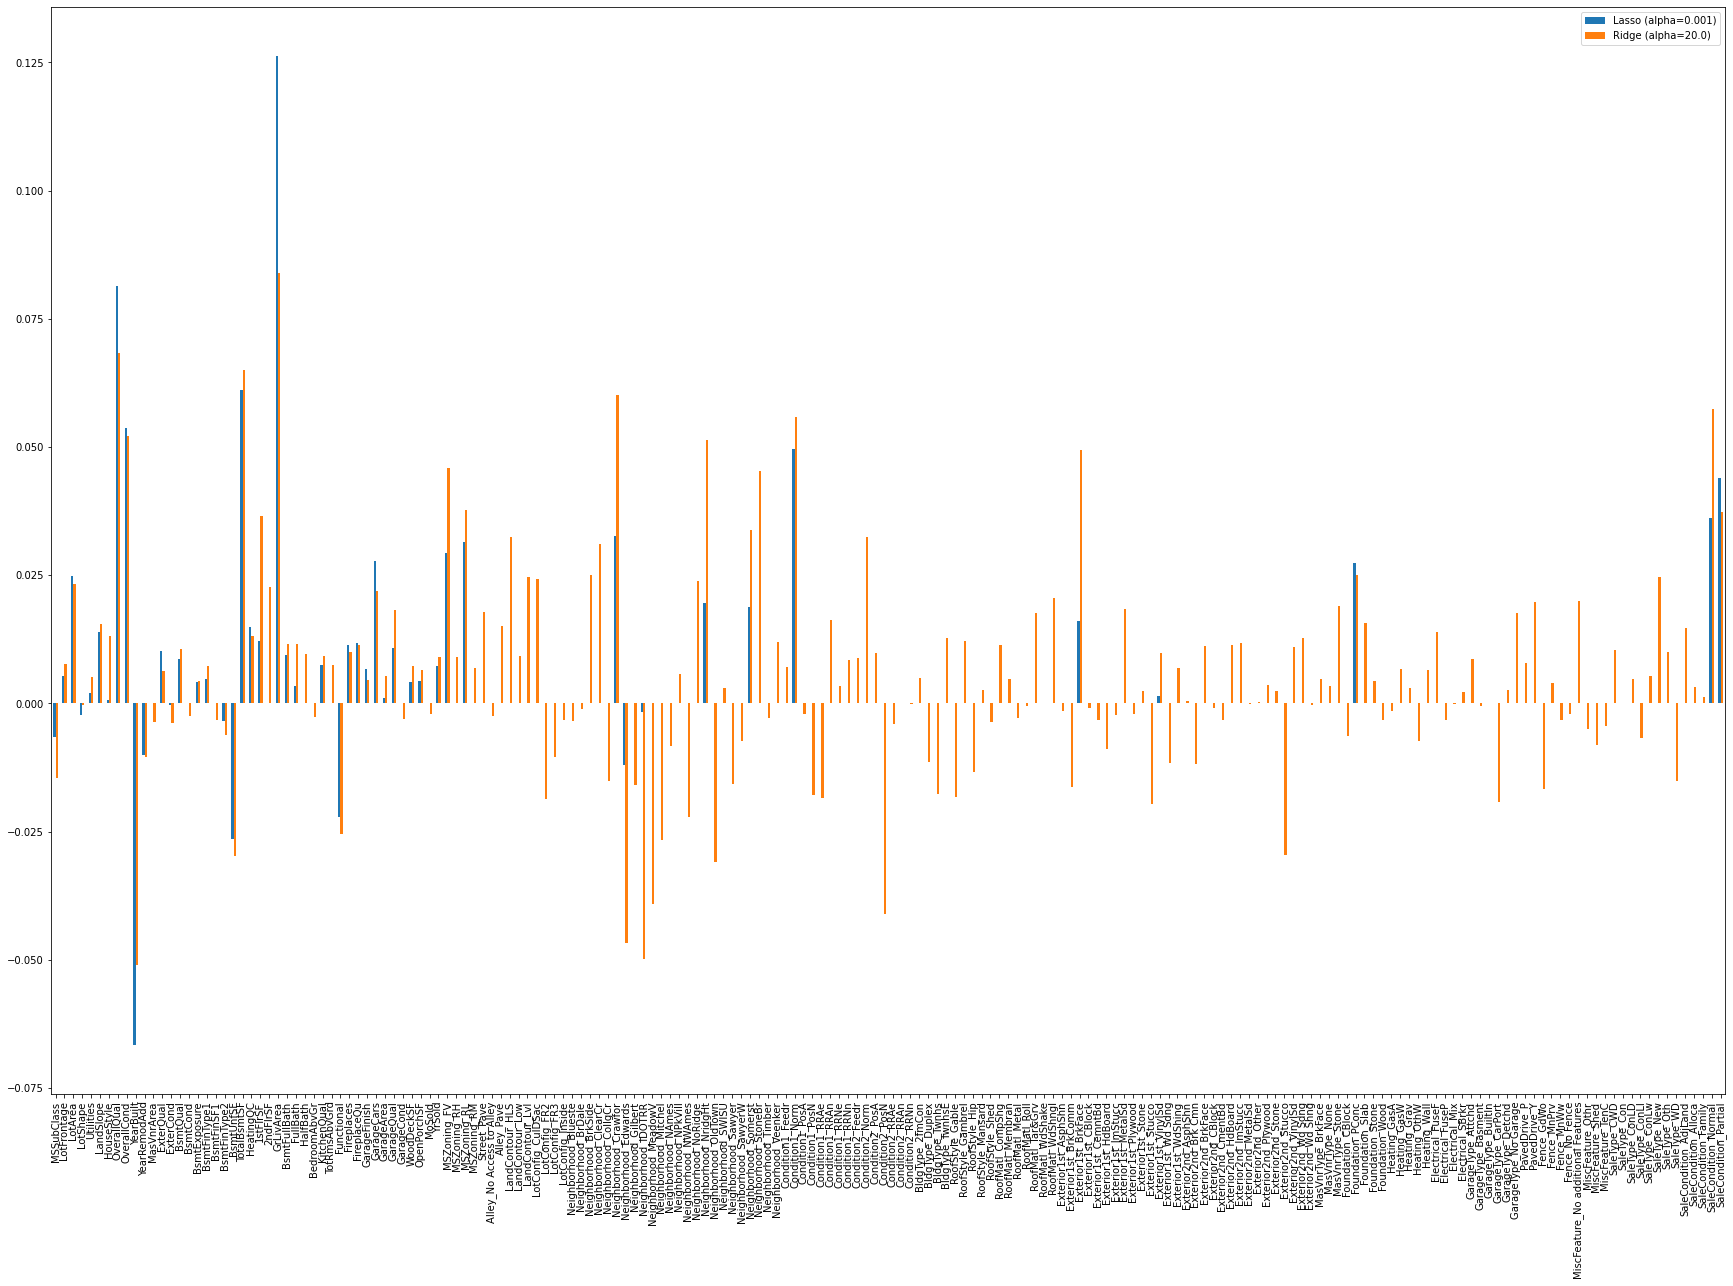

In [255]:
model_coefficients[['Lasso (alpha=0.001)', 'Ridge (alpha=20.0)']].plot(kind='bar', figsize=(30,20), label='Coefficients Obtained from Ridge and Lasso')

In [256]:
model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False).index[:5]

Index(['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'OverallCond',
       'Condition1_Norm'],
      dtype='object')

In [257]:
model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=True).index[:5]

Index(['YearBuilt', 'BsmtUnfSF', 'Functional', 'Neighborhood_Edwards',
       'YearRemodAdd'],
      dtype='object')

In [258]:


model_coefficients[[ 'Ridge (alpha=20.0)']].sort_values(by='Ridge (alpha=20.0)', ascending=False).index[:5]  

Index(['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'Neighborhood_Crawfor',
       'SaleCondition_Normal'],
      dtype='object')

In [259]:


model_coefficients[[ 'Ridge (alpha=20.0)']].sort_values(by='Ridge (alpha=20.0)', ascending=True).index[:5]  

Index(['YearBuilt', 'Neighborhood_IDOTRR', 'Neighborhood_Edwards',
       'Condition2_PosN', 'Neighborhood_MeadowV'],
      dtype='object')

`Observations:`
- Lasso Regression 
    - Top Positive Coefficients
        1. GrLivArea
        2. OverallQual
        3. SaleCondition_Partial
        4. Neighborhood_Crawfor
        5. TotalBsmtSF
    - Top Negative Coefficient
        1. YearBuilt
        2. Neighborhood_IDOTRR
        3. Neighborhood_Edwards
        4. BsmtUnfSF
        5. Functional
- Ridge Regression
    - Top Positive Coefficients
        1. GrLivArea
        2. OverallQual
        3. TotalBsmtSF
        4. Neighborhood_Crawfor
        5. SaleCondition_Normal
    - Top Negative Coefficients
        1. YearBuilt 
        2. Neighborhood_IDOTRR
        3. Neighborhood_Edwards
        4. Condition2_PosN
        5. Neighborhood_MeadowV

`Subjective Questions Solution`

`Q1` What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Ans: Current Optimal Alpha for Ridge is 20, and for Lasso it is 0.001
Doubling it would make alpha for Ridge as 40, and for Lasso its 0.002

In [260]:
alpha = 0.002
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, Y_train)
Y_Train_pred_L = lasso_model.predict(X_train)
Y_Test_pred_L = lasso_model.predict(X_test)

In [261]:
model_coeff = pd.DataFrame(index=X_test.columns)
model_coeff.rows = X_test.columns
model_coeff['Lasso'] = lasso_model.coef_
model_coeff.sort_values(by='Lasso', ascending=False).head(5)

,Lasso
GrLivArea,0.126169
OverallQual,0.081421
TotalBsmtSF,0.061143
OverallCond,0.053663
Condition1_Norm,0.049586


In [262]:
alpha = 40
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, Y_train)
Y_Train_pred_R = ridge_model.predict(X_train)
Y_Test_pred_R = ridge_model.predict(X_test)

In [263]:
model_coeff = pd.DataFrame(index=X_test.columns)
model_coeff.rows = X_test.columns
model_coeff['Ridge'] = ridge_model.coef_
model_coeff.sort_values(by='Ridge', ascending=False).head(5)

,Ridge
GrLivArea,0.075669
OverallQual,0.069109
TotalBsmtSF,0.054370
OverallCond,0.050924
Condition1_Norm,0.047609


In [264]:
X_train_new= X_train.drop(['GrLivArea' , 'OverallQual','SaleCondition_Partial' ,'Neighborhood_Crawfor','TotalBsmtSF'], axis=1)

In [265]:
X_test_new= X_test.drop(['GrLivArea' , 'OverallQual','SaleCondition_Partial' ,'Neighborhood_Crawfor','TotalBsmtSF'], axis=1)


In [266]:
alpha = 0.001
lasso_model_new = Lasso(alpha=alpha)
lasso_model_new.fit(X_train_new, Y_train)
Y_train_pred_new_l = lasso_model_new.predict(X_train_new)
Y_test_pred_new_l = lasso_model_new.predict(X_test_new)

In [267]:
model_coeff = pd.DataFrame(index=X_test_new.columns)
model_coeff.rows = X_test_new.columns
model_coeff['Lasso'] = lasso_model_new.coef_
model_coeff.sort_values(by='Lasso', ascending=False).head(5)

,Lasso
1stFlrSF,0.132456
2ndFlrSF,0.110043
Neighborhood_StoneBr,0.095354
Neighborhood_NridgHt,0.089702
Exterior1st_BrkFace,0.077633
